In [47]:
%matplotlib inline

import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

logs_dir = 'logs'

In [48]:
x = [6.2, 9.5, 10.5, 7.7, 8.6, 34.1, 11, 6.9, 7.3, 15.1, 29.1, 2.2, 5.7, 2,
     2.5, 4, 5.4, 2.2, 7.2, 15.1, 16.5, 18.4, 36.2, 39.7, 18.5, 23.3, 12.2,
     5.6, 21.8, 21.6, 9, 3.6, 5, 28.6, 17.4, 11.3, 3.4, 11.9, 10.5, 10.7, 10.8,
     4.8]
y = [29, 44, 36, 37, 53, 68, 75, 18, 31, 25, 34, 14, 11, 11, 22, 16, 27, 9, 29,
     30, 40, 32, 41, 147, 22, 29, 46, 23, 4, 31, 39, 15, 32, 27, 32, 34, 17,
     46, 42, 43, 34, 19]


In [78]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

Y_predicted = X * w + b
loss = tf.square(Y - Y_predicted, name='loss')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001).minimize(loss)
init = tf.global_variables_initializer()



In [79]:
with tf.Session() as sess:
    # writer = tf.summary.FileWriter(logs_dir, sess.graph)
    sess.run(init)
    for i in range(100):
        total_loss = 0
        for j in range(len(x)):
            _, current_loss = sess.run([optimizer, loss], feed_dict={X: x[j], Y: y[j]})
            total_loss += current_loss
        print("Epoch {} finished. Average Loss: {}".format(i,total_loss / len(x) ))
    w_value, b_value = sess.run([w, b])
    print("Final weights: {}".format(w_value))
    print("Final bias: {}".format(b_value))
    # writer.close

Epoch 0 finished. Average Loss: 2069.6319333978354
Epoch 1 finished. Average Loss: 2117.0123581953535
Epoch 2 finished. Average Loss: 2092.302723001866
Epoch 3 finished. Average Loss: 2068.5080461938464
Epoch 4 finished. Average Loss: 2045.591184088162
Epoch 5 finished. Average Loss: 2023.5146448101316
Epoch 6 finished. Average Loss: 2002.2447619835536
Epoch 7 finished. Average Loss: 1981.748338803649
Epoch 8 finished. Average Loss: 1961.9944411260742
Epoch 9 finished. Average Loss: 1942.9520116143283
Epoch 10 finished. Average Loss: 1924.5930823644712
Epoch 11 finished. Average Loss: 1906.8898800636332
Epoch 12 finished. Average Loss: 1889.8164505837929
Epoch 13 finished. Average Loss: 1873.347133841543
Epoch 14 finished. Average Loss: 1857.4588400604468
Epoch 15 finished. Average Loss: 1842.1278742424079
Epoch 16 finished. Average Loss: 1827.332495119955
Epoch 17 finished. Average Loss: 1813.0520579712022
Epoch 18 finished. Average Loss: 1799.2660847636982
Epoch 19 finished. Average 

TypeError: 'numpy.float32' object cannot be interpreted as an integer

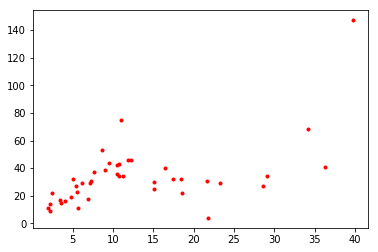

In [85]:
best_fit_x = [0, 40]
best_fit_y = [b_value, 40 * w_value + b_value]
plt.plot(x, y, 'r.')
plt.plot(x, x * w_value + b_value)
# X_input = np.linspace(-1, 1, 100)
# Y_input = X_input * 3 + np.random.randn(X_input.shape[0]) * 0.5